<a href="https://colab.research.google.com/github/Rachel-0420/Cross-Entropy-Fast-Transient/blob/Normal-Distributions/HighD%20Normal%20Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Shifted

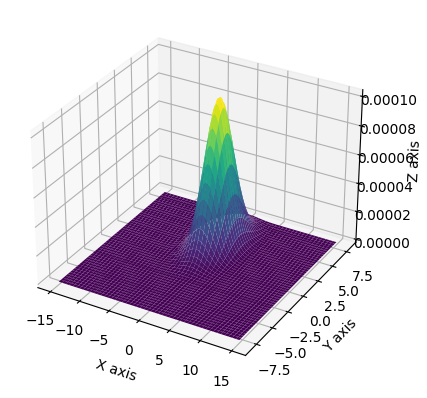

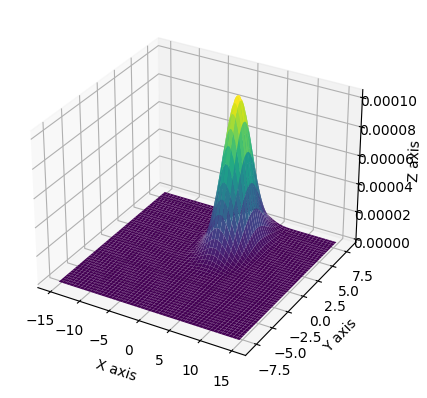

(45.57141571922802, 74.868984959564)


In [2]:
H_x12 = []
H_y12 = []

ref_1, ref_2 = 0, 0

mu_x1, mu_y1 = 0, 3
mu_x2, mu_y2 = 2, 4

variance = 3

x = np.linspace(-15,15,500)
y = np.linspace(-8,8,500)

X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

func_1 = multivariate_normal([mu_x1, mu_y1], [[variance, 0], [0, variance]])
func_2 = multivariate_normal([mu_x2, mu_y2], [[variance, 0], [0, variance]])

# normalizing the probabilities
fact_1 = 1 / np.sum(func_1.pdf(pos))
fact_2 = 1 / np.sum(func_2.pdf(pos))

func_1_eval = func_1.pdf(pos) * fact_1
func_2_eval = func_2.pdf(pos) * fact_2
# for i in range(len(func_1.pdf(pos))):
#   func_1.pdf(pos)[i] *= fact_1
# for j in range(len(func_2.pdf(pos))):
#   func_2.pdf(pos)[j] *= fact_2

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_1_eval,cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_2_eval,cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# projections
pdf_x1 = norm.pdf(x, mu_x1, variance)
pdf_y1 = norm.pdf(y, mu_y1, variance)
pdf_x2 = norm.pdf(x, mu_x2, variance)
pdf_y2 = norm.pdf(y, mu_y2, variance)

for i in range(len(pdf_x1)):
  H_x12.append(- pdf_x1[i] * math.log(pdf_x2[i]))
  H_y12.append(- pdf_y1[i] * math.log(pdf_y2[i]))
  ref_1 += H_x12[i]
  ref_2 += H_y12[i]

# ref is the 'integral' of cross entropy of each dimensions
print((ref_1, ref_2))

In [3]:
var1 = func_1_eval
var2 = np.log(func_2_eval)

In [4]:
# overall cross entropy
H1 = - var1 * var2
print(H1)

[[7.52614385e-28 1.01167463e-27 1.35826589e-27 ... 1.02419986e-27
  7.62892652e-28 5.67570279e-28]
 [8.45031804e-28 1.13589588e-27 1.52503415e-27 ... 1.14935488e-27
  8.56124142e-28 6.36937507e-28]
 [9.48474187e-28 1.27493519e-27 1.71169453e-27 ... 1.28936318e-27
  9.60421230e-28 7.14538615e-28]
 ...
 [5.47890054e-21 7.35376271e-21 9.85819145e-21 ... 6.55705154e-21
  4.89537405e-21 3.65035038e-21]
 [5.20012612e-21 6.97962063e-21 9.35666785e-21 ... 6.22570155e-21
  4.64796179e-21 3.46583763e-21]
 [4.93387073e-21 6.62227887e-21 8.87766253e-21 ... 5.90911491e-21
  4.41157469e-21 3.28954835e-21]]


In [14]:
# sum of cross entropy

sum_H1 = 0

for i in range(len(H1)):
  for j in range(len(H1[0])):
    sum_H1 += H1[i][j]

print(sum_H1)

11.00573789242233


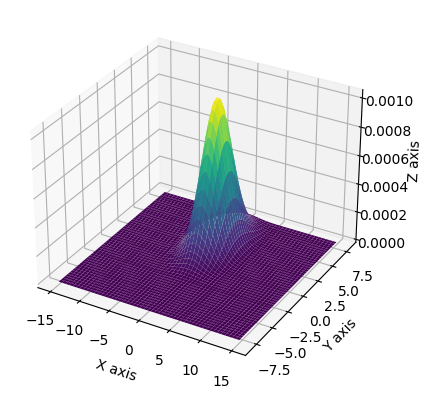

In [13]:
# Figure of the overall cross entropy
fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, H1, cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Different variance

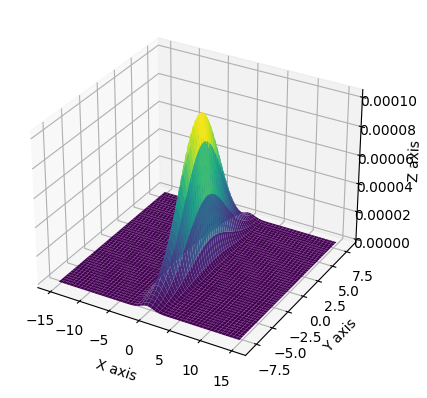

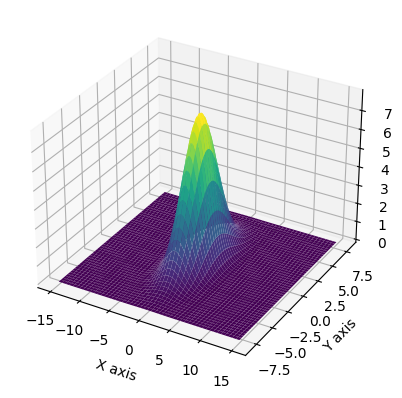

(34.48266941122472, 56.95741095765778)


In [15]:
H_x34 = []
H_y34 = []

ref_3, ref_4 = 0, 0

mu = 0
variance_x3, variance_y3 = 1, 9
variance_x4, variance_y4 = 3, 5

func_3 = multivariate_normal([mu, mu], [[variance_x3, 0], [0, variance_y3]])
func_4 = multivariate_normal([mu, mu], [[variance_x4, 0], [0, variance_y4]])

# normalizing the probabilities
fact_3 = 1 / np.sum(func_3.pdf(pos))
fact_4 = 1 / np.sum(func_4.pdf(pos))

func_3_eval = func_3.pdf(pos) * fact_3
func_4_eval = func_4.pdf(pos) * fact_4

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_3_eval,cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, func_4_eval,cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# projections
pdf_x3 = norm.pdf(x, mu, variance_x3)
pdf_y3 = norm.pdf(y, mu, variance_y3)
pdf_x4 = norm.pdf(x, mu, variance_x4)
pdf_y4 = norm.pdf(y, mu, variance_y4)

for i in range(len(pdf_x1)):
  H_x34.append(- pdf_x3[i] * math.log(pdf_x4[i]))
  H_y34.append(- pdf_y3[i] * math.log(pdf_y4[i]))
  ref_3 += H_x34[i]
  ref_4 += H_y34[i]

# ref is the 'integrals' of the overall cross entropy
print((ref_3, ref_4))

In [16]:
# overall cross entropy

var3 = func_3_eval
var4 = np.log(func_4_eval)

H2 = - var3 * var4
print(H2)

[[2.17678633e-53 5.32390033e-53 1.29738935e-52 ... 1.29738935e-52
  5.32390033e-53 2.17678633e-53]
 [2.23744295e-53 5.47222223e-53 1.33352684e-52 ... 1.33352684e-52
  5.47222223e-53 2.23744295e-53]
 [2.29953384e-53 5.62405043e-53 1.37051839e-52 ... 1.37051839e-52
  5.62405043e-53 2.29953384e-53]
 ...
 [2.29953384e-53 5.62405043e-53 1.37051839e-52 ... 1.37051839e-52
  5.62405043e-53 2.29953384e-53]
 [2.23744295e-53 5.47222223e-53 1.33352684e-52 ... 1.33352684e-52
  5.47222223e-53 2.23744295e-53]
 [2.17678633e-53 5.32390033e-53 1.29738935e-52 ... 1.29738935e-52
  5.32390033e-53 2.17678633e-53]]


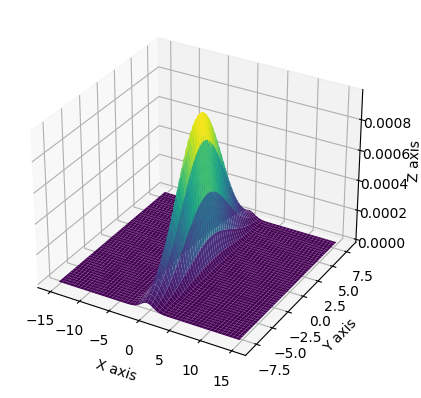

In [17]:
# Figure of the overall cross entropy

fig, ax = plt.subplots(subplot_kw = {"projection": "3d"})
ax.plot_surface(X, Y, H2, cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

In [18]:
# sum of cross entropy

sum_H2 = 0

for i in range(len(H2)):
  for j in range(len(H2[0])):
    sum_H2 += H2[i][j]

print(sum_H2)

10.455214221061452
